# Problema 1 sección 5.4 ejercicio 8

8. We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

`rng = np.random.default_rng(1)`

`x = rng.normal(size=100)`

`y = x - 2 * x**2 + rng.normal(size=100)`

In this data set, what is ***n*** and what is ***p***?

Write out the model used to generate the data in equation form.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

***n***: es el número de observaciones, que en este caso es 100

In [19]:
print("Número de observaciones (n) de 'x' ^ 'y' = ", len(x))

Número de observaciones (n) de 'x' ^ 'y' =  100


***p***: Es el número de predictores del modelo, en este contexto `p`= 1 porque solo hay una variable predictora que es `x`.

El modelo usado para generar `y`, es una ecuacuión cuadrátiva que puede ser escrita como:

$$y=\beta_0 + \beta_1 x + \beta_2 x^2+ \varepsilon


Donde:

$$ \beta_0 = 0 , \beta_1 = 1, 
 \beta_2 = -2

Por lo tanto, la función se puede escribir como:

$$ y= x -2 x^2 + \varepsilon


(b) Create a scatterplot of X against Y . Comment on what you fnd.

In [21]:
df=pd.DataFrame({"y":y,"x":x})
df.head()

,y,x
0,-0.544554,0.345584
1,0.333950,0.821618
2,-0.013532,0.330437
3,-4.030442,-1.303157
4,0.484861,0.905356


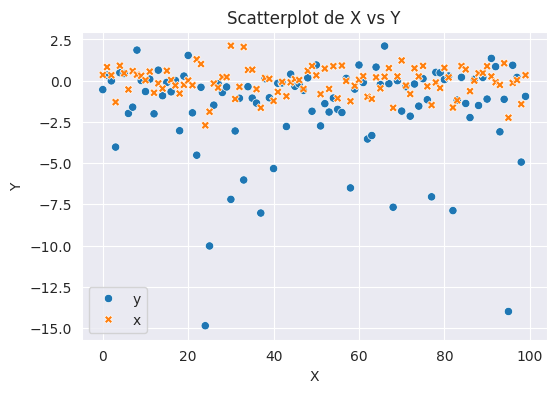

In [33]:
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
fig=sns.scatterplot(df,legend=True)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot de X vs Y")

plt.show()